In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import linregress
from scipy import stats
from datetime import date

In [2]:
combined_data = pd.read_csv("combined_data.csv")
nc_coordinate_data = pd.read_csv("NC_Coordinate_Data.csv")

In [3]:
combined_df = pd.merge(combined_data, nc_coordinate_data, on="city_id")
combined_df.head()

,id,city_id,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,sunrise,sunset,moonphase,conditions,description,icon,stations,City,Latitude,Longitude
0,1,nc01,"asheville,NC",1/1/23,62.8,40.3,48.1,62.8,40.3,48.1,...,2023-01-01T07:39:54,2023-01-01T17:27:50,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",Asheville,35.5929,-82.557733
1,2,nc01,"asheville,NC",1/2/23,65.3,40.4,49.0,65.3,40.4,48.9,...,2023-01-02T07:40:04,2023-01-02T17:28:37,0.35,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",Asheville,35.5929,-82.557733
2,3,nc01,"asheville,NC",1/3/23,64.0,49.4,57.5,64.0,49.4,57.5,...,2023-01-03T07:40:12,2023-01-03T17:29:25,0.39,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"72314453890,MAHN7,72315003812,F2588,9999995387...",Asheville,35.5929,-82.557733
3,4,nc01,"asheville,NC",1/4/23,60.6,42.3,54.8,60.6,40.2,54.7,...,2023-01-04T07:40:18,2023-01-04T17:30:14,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",Asheville,35.5929,-82.557733
4,5,nc01,"asheville,NC",1/5/23,58.2,32.8,44.8,58.2,32.8,44.0,...,2023-01-05T07:40:22,2023-01-05T17:31:04,0.46,"Snow, Rain",Clear conditions throughout the day with rain ...,rain,"72314453890,72315003812,F2588,99999953877,9999...",Asheville,35.5929,-82.557733


In [4]:
del combined_df['City']
combined_df = combined_df.rename(columns={'name':'city'})
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

/var/folders/_0/z435wnvn6236c4cm5wmb3_4w0000jc/T/ipykernel_75274/3704893527.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])


In [5]:
snow_df = combined_df[combined_df['icon'].str.contains('snow')]

In [6]:
snow_days_df = pd.DataFrame(snow_df['city'].value_counts())
snow_days_df

,count
city,
"Banner Elk, NC",13
"Boone, NC",9
cherokee nc,3
"High Point, NC",1
"winston-salem, nc",1


<IPython.core.display.Javascript object>


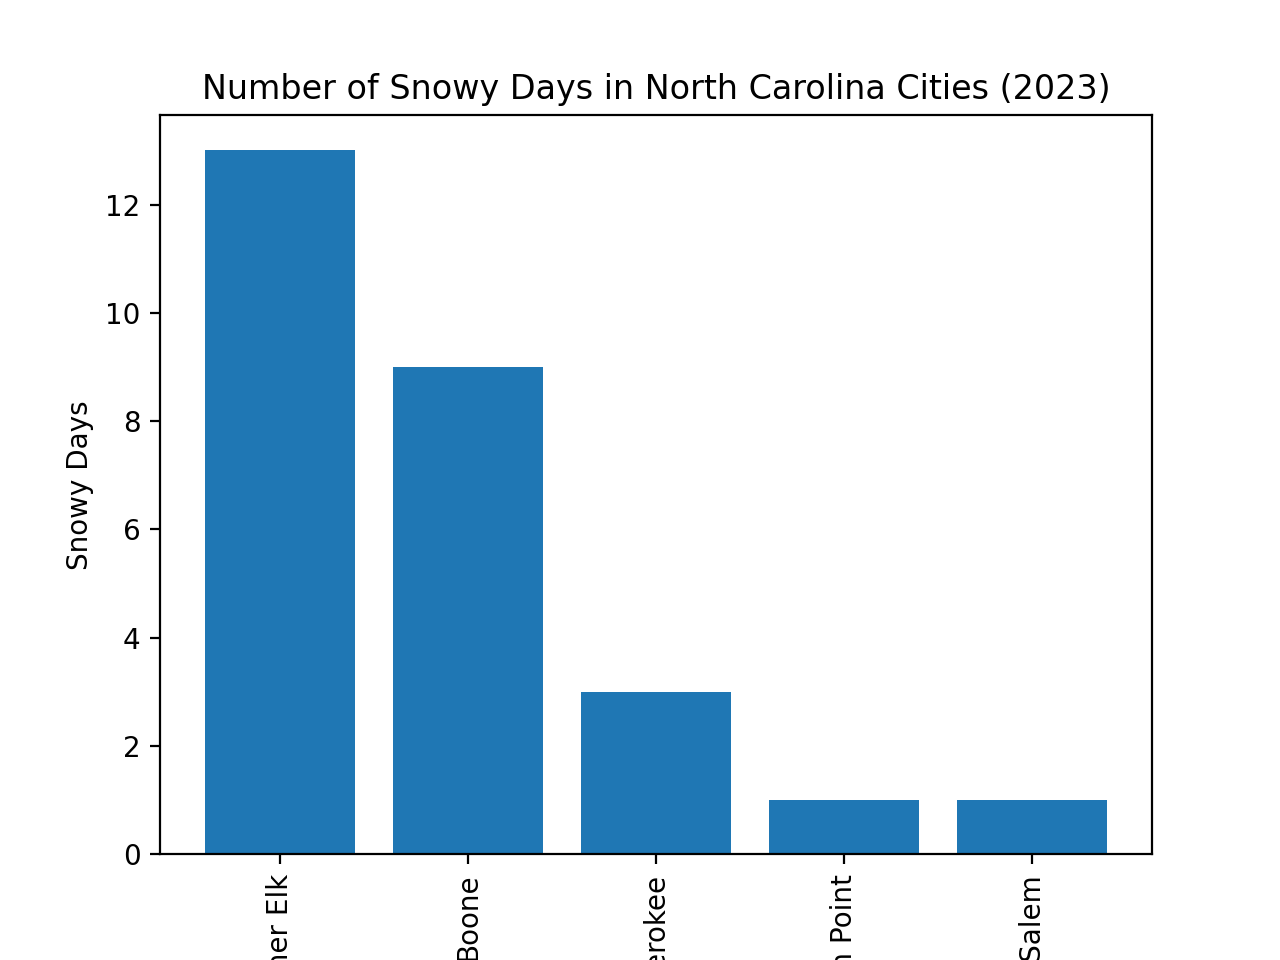

In [7]:
x_axis = np.arange(len(snow_days_df))
plt.bar(x_axis, snow_days_df['count'])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Banner Elk", "Boone", "Cherokee", "High Point", "Winston-Salem"], rotation="vertical")
plt.title('Number of Snowy Days in North Carolina Cities (2023)')
plt.xlabel('City')
plt.ylabel('Snowy Days')
plt.show()